# **Clase 16 - Grupo 2**

In [100]:
# Importar las librerías necesarias para crear datos, clustering y visualización.
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Cargar el dataset de vinos (wine) desde scikit-learn
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)


df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


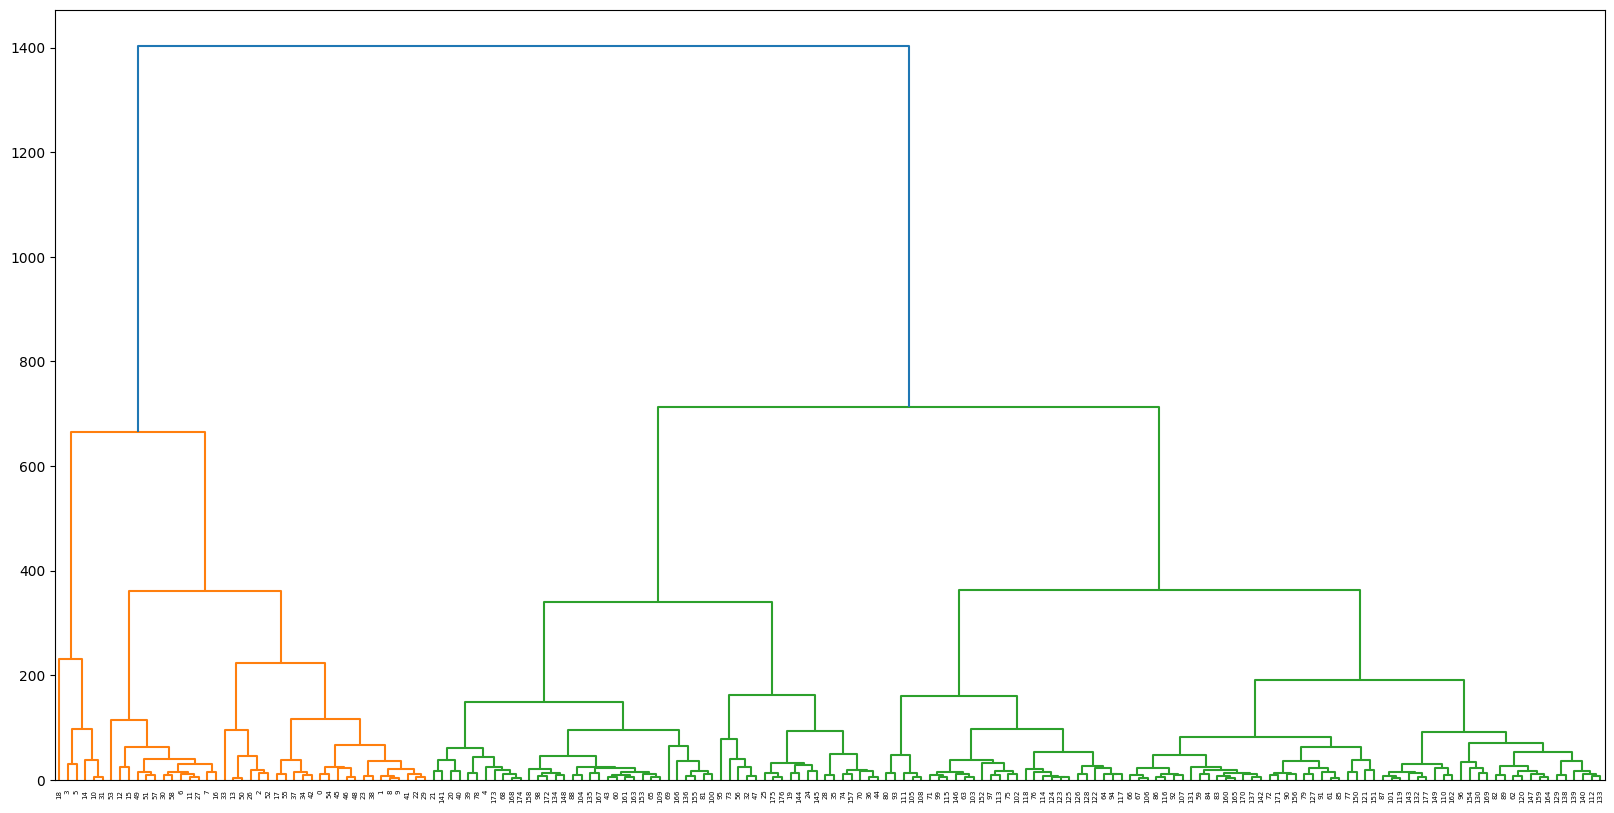

In [102]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Realizar el linkage (enlace) para el clustering jerárquico.
# Se utiliza el método 'complete' para calcular la distancia entre clusters.
model = linkage(df, method = 'complete')

# Se crea el dendrograma y se muestra la figura
plt.figure(figsize=(20,10))
dn = dendrogram(model)
plt.show()

In [103]:
# Cortar el dendrograma a una distancia específica (700) para formar los 3 dataframes.
labels = fcluster(wine_linkage, 700, criterion = 'distance')
pd.Series(labels).value_counts()

,count
3,83
2,52
1,43


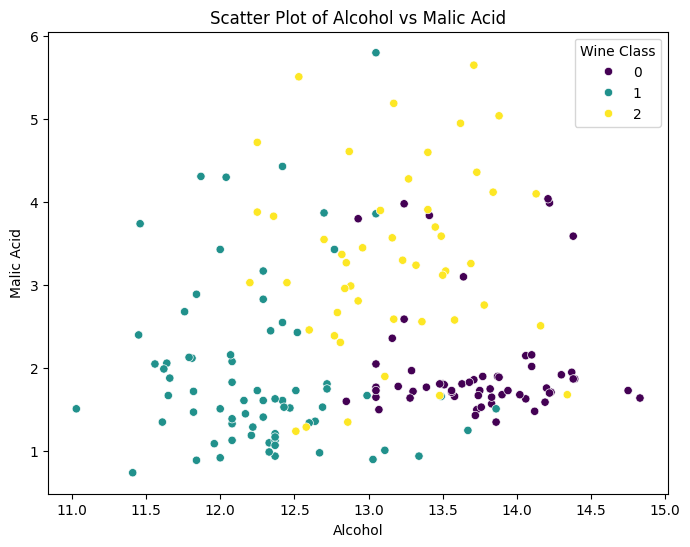

In [104]:
df['target'] = wine.target

# Crear un scatter (scatter plot) de 'alcohol' vs 'malic_acid'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='malic_acid', hue='target', data=df, palette='viridis')

plt.title('Scatter Plot of Alcohol vs Malic Acid')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(title='Wine Class')
plt.show()

In [105]:
# Inicializar el clustering
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit(df[['alcohol', 'malic_acid']])

AgglomerativeClustering(n_clusters=3)

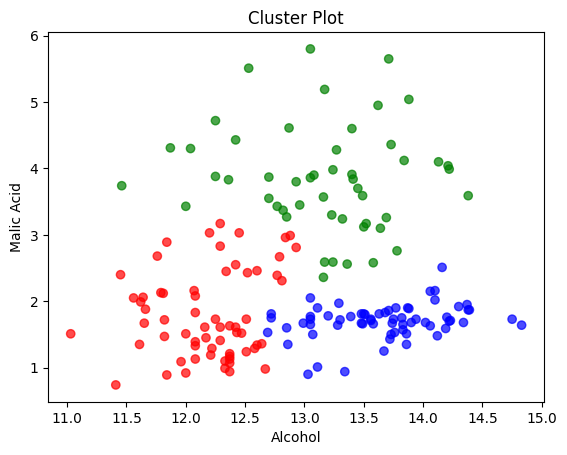

In [106]:
# Diccionario de colores
colors = {0:'red', 1:'green', 2:'blue'}

# Mostramos el scatter ahora con el clustering hecho
plt.scatter(df['alcohol'], df['malic_acid'], c=pd.Series(cluster.labels_).apply(lambda x:colors[x]), alpha=0.7)
plt.title('Cluster Plot')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()